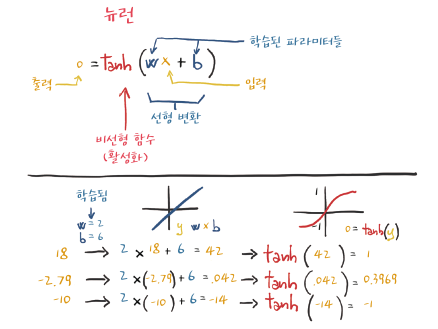

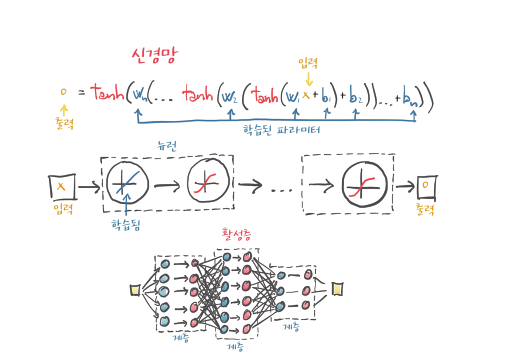

In [1]:
import torch

In [5]:

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

print(t_u.shape)

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

print(train_indices, val_indices)

t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val


torch.Size([11, 1])
tensor([ 4, 10,  8,  1,  9,  3,  6,  7,  2]) tensor([5, 0])


In [6]:
# torch.nn 신경망 전용 서브모델
# forward 대신에 __call__사용하기

In [7]:
import torch.nn as nn
linear_model = nn.Linear(1,1)
linear_model(t_un_val)

tensor([[4.0438],
        [2.7720]], grad_fn=<AddmmBackward0>)

In [13]:
class Test:
    def __init__(self):
        pass
    def __call__(self,str):
        return f'called data is {str}'
temp = Test()    

In [14]:
temp('hello')

'called data is hello'

In [15]:
help(nn.Linear)

Help on class Linear in module torch.nn.modules.linear:

class Linear(torch.nn.modules.module.Module)
 |  Linear(in_features: int, out_features: int, bias: bool = True, device=None, dtype=None) -> None
 |  
 |  Applies a linear transformation to the incoming data: :math:`y = xA^T + b`
 |  
 |  This module supports :ref:`TensorFloat32<tf32_on_ampere>`.
 |  
 |  On certain ROCm devices, when using float16 inputs this module will use :ref:`different precision<fp16_on_mi200>` for backward.
 |  
 |  Args:
 |      in_features: size of each input sample
 |      out_features: size of each output sample
 |      bias: If set to ``False``, the layer will not learn an additive bias.
 |          Default: ``True``
 |  
 |  Shape:
 |      - Input: :math:`(*, H_{in})` where :math:`*` means any number of
 |        dimensions including none and :math:`H_{in} = \text{in\_features}`.
 |      - Output: :math:`(*, H_{out})` where all but the last dimension
 |        are the same shape as the input and :math

In [16]:
linear_model.weight

Parameter containing:
tensor([[0.9635]], requires_grad=True)

In [17]:
linear_model.bias

Parameter containing:
tensor([-0.6677], requires_grad=True)

In [18]:
x = torch.ones(1)
x

tensor([1.])

In [19]:
linear_model(x)

tensor([0.2958], grad_fn=<AddBackward0>)

In [21]:
x = torch.ones(10,1)
linear_model(x)

tensor([[0.2958],
        [0.2958],
        [0.2958],
        [0.2958],
        [0.2958],
        [0.2958],
        [0.2958],
        [0.2958],
        [0.2958],
        [0.2958]], grad_fn=<AddmmBackward0>)

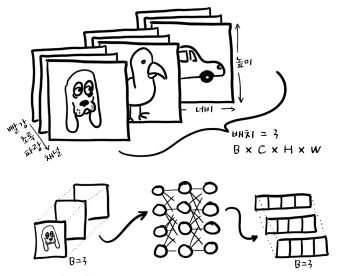

In [22]:
#GPU가 병렬 연산에 최적화 되어 있기때문에.. 배치형태로 만들어야 효율적

In [24]:
linear_model = nn.Linear(1,1)
optimizer = torch.optim.SGD(linear_model.parameters(), lr = 1e-2)

In [26]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.2189]], requires_grad=True),
 Parameter containing:
 tensor([0.9016], requires_grad=True)]

In [28]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs+1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val =  model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        print(f"epoch : {epoch} training loss : {loss_train.item():.4f}  validation loss : {loss_val.item():.4f}")
        

In [38]:
linear_model = nn.Linear(1,1)
optimizer = torch.optim.SGD(linear_model.parameters(), lr=1e-4)
training_loop(n_epochs=3000, optimizer=optimizer, model=linear_model
              , loss_fn = nn.MSELoss()
              , t_u_train=t_u_train
              , t_u_val=t_u_val
              , t_c_train=t_c_train
              , t_c_val=t_c_val
             )

epoch : 1 training loss : 113.4518  validation loss : 175.7816
epoch : 2 training loss : 38.7685  validation loss : 80.2427
epoch : 3 training loss : 28.9585  validation loss : 55.5439
epoch : 4 training loss : 27.6693  validation loss : 47.8958
epoch : 5 training loss : 27.4992  validation loss : 45.2946
epoch : 6 training loss : 27.4761  validation loss : 44.3736
epoch : 7 training loss : 27.4723  validation loss : 44.0420
epoch : 8 training loss : 27.4711  validation loss : 43.9215
epoch : 9 training loss : 27.4702  validation loss : 43.8771
epoch : 10 training loss : 27.4693  validation loss : 43.8602
epoch : 11 training loss : 27.4685  validation loss : 43.8534
epoch : 12 training loss : 27.4676  validation loss : 43.8502
epoch : 13 training loss : 27.4667  validation loss : 43.8482
epoch : 14 training loss : 27.4659  validation loss : 43.8468
epoch : 15 training loss : 27.4650  validation loss : 43.8455
epoch : 16 training loss : 27.4642  validation loss : 43.8443
epoch : 17 trai

In [33]:
linear_model.weight, linear_model.bias

(Parameter containing:
 tensor([[0.2518]], requires_grad=True),
 Parameter containing:
 tensor([-0.2640], requires_grad=True))